# Twitter Sentiment and Bitcoin Price

- Loads the collected Twitter and Price datasets
- Adds movement features to each dataset corresponding with price and sentiment movements
- Merges both datasets by hour
- Performs exploratory data analysis
- Outputs .csv file of newly merged dataset for use in preditive modelling

In [1]:
import json
import pandas as pd
import io
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import scipy
import matplotlib.pyplot as plt
from tqdm import tnrange, tqdm_notebook, tqdm
import glob
from datetime import datetime, timedelta
import time

In [2]:
# Define folders
PRICE_FOLDER    = "data/price/"
TWITTER_FOLDER  = "data/twitter/"

# Twitter data
tweets_clean_file = './data/twitter/bitcoin_tweets_clean.csv'
# Twitter sentiment
twitter_sentiment_file = './data/twitter/bitcoin_twitter_sentiment.csv'
# Price data
price_clean_file = './data/price/bitcoin_price_clean.csv'

## Load Datasets

### Twitter Dataset

In [3]:
df_twitter = pd.read_csv(twitter_sentiment_file)
# Set hour to datetime type
df_twitter['Hour'] = pd.to_datetime(df_twitter['Hour'])

# Compute hourly compound change
df_twitter['Compound Change'] = df_twitter.compound.diff(periods=1)

# Compute hourly score change
df_twitter['Score Change'] = df_twitter.score.diff(periods=1)

# Compute classification of compund change (positive or negative)
movement_compound = []
for i, s in enumerate(tqdm(df_twitter['Compound Change'])):
    if s > 0:
        x = 1
    else:
        x = -1
    movement_compound.append(x)
df_twitter['Compound Movement'] = movement_compound

# Compute classification of compund change (positive or negative)
movement_score = []
for i, s in enumerate(tqdm(df_twitter['Score Change'])):
    if s > 0:
        x = 1
    else:
        x = -1
    movement_score.append(x)
df_twitter['Score Movement'] = movement_score

100%|██████████| 805/805 [00:00<00:00, 454002.25it/s]


In [4]:
df_twitter.head(60)

,Hour,Tweets,Likes,Retweets,compound,score,Compound Change,Score Change,Compound Movement,Score Movement
0,2021-09-13 00:00:00,1,0,0,0.0000,0.000000e+00,NaN,NaN,-1,-1
1,2021-09-13 01:00:00,1,0,0,-0.5407,-1.917322e+03,-0.5407,-1.917322e+03,-1,-1
2,2021-09-13 02:00:00,1,0,0,0.0000,0.000000e+00,0.5407,1.917322e+03,1,1
3,2021-09-13 03:00:00,1,0,0,0.0953,1.429500e+00,0.0953,1.429500e+00,1,1
4,2021-09-13 04:00:00,2,0,0,0.6472,7.595360e+01,0.5519,7.452410e+01,1,1
5,2021-09-13 05:00:00,1,0,0,0.0772,3.489440e+01,-0.5700,-4.105920e+01,-1,-1
6,2021-09-13 06:00:00,2,1,0,-0.2144,-4.163648e+02,-0.2916,-4.512592e+02,-1,-1
7,2021-09-13 07:00:00,1,0,0,0.8118,3.141666e+02,1.0262,7.305314e+02,1,1
8,2021-09-13 08:00:00,2,3,1,0.6808,2.668736e+02,-0.1310,-4.729300e+01,-1,-1
9,2021-09-13 09:00:00,1,0,0,-0.1027,-1.304290e+01,-0.7835,-2.799165e+02,-1,-1


### Price Dataset

In [6]:
# Read price file
df_price = pd.read_csv(price_data_file)
# Convert Time to datetime
df_price['Time'] = pd.to_datetime(df_price['Time'])
# Duplicate Time column to hour only
Hour = []
for i, s in enumerate(tqdm(df_price['Time'])):
    t = s.replace(tzinfo=None)
    Hour.append(t)
df_price['Hour'] = Hour

# Compute hourly price change
df_price['Change'] = df_price.Open.diff(periods=1)

# Compute classification of price change (positive or negative)
movement = []
for i, s in enumerate(tqdm(df_price['Change'])):
    if s > 0:
        x = 1
    else:
        x = -1
    movement.append(x)
df_price['Movement'] = movement

# Drop unnecessary columns
#df_price = df_price.drop(columns=['Close', 'Adj Close'])

df_price.head(10)

100%|██████████| 793/793 [00:00<00:00, 398906.58it/s]


,Time,Open,High,Low,Close,Adj Close,Volume,Hour,Change,Movement
0,2021-09-13 21:00:00,44770.371094,45156.468750,44770.371094,45156.468750,45156.468750,0.0,2021-09-13 21:00:00,NaN,-1
1,2021-09-13 22:00:00,45168.273438,45460.640625,44950.796875,45158.886719,45158.886719,338006016.0,2021-09-13 22:00:00,397.902344,1
2,2021-09-13 23:00:00,45152.378906,45220.621094,44993.496094,45086.214844,45086.214844,210644992.0,2021-09-13 23:00:00,-15.894531,-1
3,2021-09-14 00:00:00,45063.773438,45131.945312,44856.496094,44963.074219,44963.074219,34320384.0,2021-09-14 00:00:00,-88.605469,-1
4,2021-09-14 01:00:00,44960.050781,45277.441406,44752.332031,45201.953125,45201.953125,285896704.0,2021-09-14 01:00:00,-103.722656,-1
5,2021-09-14 02:00:00,45183.253906,45353.042969,45123.718750,45156.507812,45156.507812,310390784.0,2021-09-14 02:00:00,223.203125,1
6,2021-09-14 03:00:00,45160.417969,45181.898438,45010.687500,45107.910156,45107.910156,0.0,2021-09-14 03:00:00,-22.835938,-1
7,2021-09-14 04:00:00,45085.078125,45326.109375,45085.078125,45228.804688,45228.804688,0.0,2021-09-14 04:00:00,-75.339844,-1
8,2021-09-14 05:00:00,45242.101562,45352.996094,45124.781250,45125.746094,45125.746094,736956416.0,2021-09-14 05:00:00,157.023438,1
9,2021-09-14 06:00:00,45130.972656,45288.406250,45115.796875,45265.734375,45265.734375,361701376.0,2021-09-14 06:00:00,-111.128906,-1


## Merge datasets

Merge datasets by:
- Price ['Hour'] and Twitter ['Hour']

In [7]:
merged = pd.merge(df_twitter, df_price, on='Hour')
# Set index as hour
merged.index = merged['Hour']
merged.head(10)

,Hour,Tweets,Likes,Retweets,compound,score,Compound Change,Score Change,Compound Movement,Score Movement,Time,Open,High,Low,Close,Adj Close,Volume,Change,Movement
Hour,,,,,,,,,,,,,,,,,,,
2021-09-13 21:00:00,2021-09-13 21:00:00,1,0,0,-0.4404,-7.4868,-1.3102,-491.9654,-1,-1,2021-09-13 21:00:00,44770.371094,45156.468750,44770.371094,45156.468750,45156.468750,0.0,NaN,-1
2021-09-13 22:00:00,2021-09-13 22:00:00,1,0,0,-0.2732,-253.8028,0.1672,-246.3160,1,-1,2021-09-13 22:00:00,45168.273438,45460.640625,44950.796875,45158.886719,45158.886719,338006016.0,397.902344,1
2021-09-13 23:00:00,2021-09-13 23:00:00,1,0,0,0.0000,0.0000,0.2732,253.8028,1,1,2021-09-13 23:00:00,45152.378906,45220.621094,44993.496094,45086.214844,45086.214844,210644992.0,-15.894531,-1
2021-09-14 00:00:00,2021-09-14 00:00:00,1,0,0,0.0000,0.0000,0.0000,0.0000,-1,-1,2021-09-14 00:00:00,45063.773438,45131.945312,44856.496094,44963.074219,44963.074219,34320384.0,-88.605469,-1
2021-09-14 01:00:00,2021-09-14 01:00:00,1,0,0,-0.4939,-602.0641,-0.4939,-602.0641,-1,-1,2021-09-14 01:00:00,44960.050781,45277.441406,44752.332031,45201.953125,45201.953125,285896704.0,-103.722656,-1
2021-09-14 02:00:00,2021-09-14 02:00:00,1,0,0,-0.7344,-2182.6368,-0.2405,-1580.5727,-1,-1,2021-09-14 02:00:00,45183.253906,45353.042969,45123.718750,45156.507812,45156.507812,310390784.0,223.203125,1
2021-09-14 03:00:00,2021-09-14 03:00:00,1,0,0,0.1779,3.5580,0.9123,2186.1948,1,1,2021-09-14 03:00:00,45160.417969,45181.898438,45010.687500,45107.910156,45107.910156,0.0,-22.835938,-1
2021-09-14 04:00:00,2021-09-14 04:00:00,1,0,0,0.1027,139.9801,-0.0752,136.4221,-1,1,2021-09-14 04:00:00,45085.078125,45326.109375,45085.078125,45228.804688,45228.804688,0.0,-75.339844,-1
2021-09-14 05:00:00,2021-09-14 05:00:00,1,0,0,0.0603,13.2057,-0.0424,-126.7744,-1,-1,2021-09-14 05:00:00,45242.101562,45352.996094,45124.781250,45125.746094,45125.746094,736956416.0,157.023438,1


# Data Analysis

In [8]:
# Bar chart number of tweets

# Group and sum tweets by day
df_twitter_daily = df_twitter.copy()
df_twitter_daily = df_twitter_daily.groupby([df_twitter_daily['Hour'].dt.date])['Tweets'].sum()


Text(0, 0.5, 'Tweets')

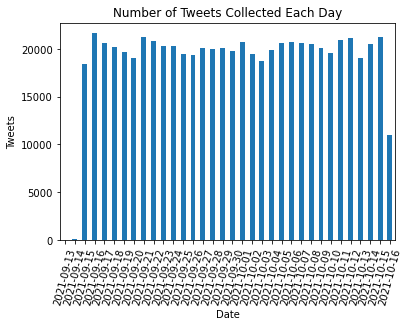

In [60]:
ax = df_twitter_daily.plot.bar(title='Number of Tweets Collected Each Day', rot=75)
ax.set_xlabel('Date')
ax.set_ylabel('Tweets')

array([[<AxesSubplot:title={'center':'compound'}>]], dtype=object)

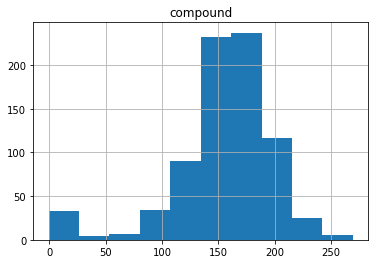

In [9]:
# Histogram of scores and compound distribution
merged.hist(column='compound')

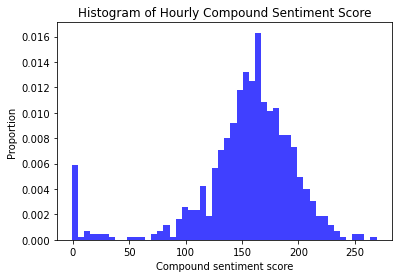

In [12]:
# the histogram of the data
n, bins, patches = plt.hist(merged.compound, 50, density=True, facecolor='b', alpha=0.75)
plt.xlabel('Compound sentiment score')
plt.ylabel('Proportion')
plt.title('Histogram of Hourly Compound Sentiment Score')
plt.grid(False)
plt.show()

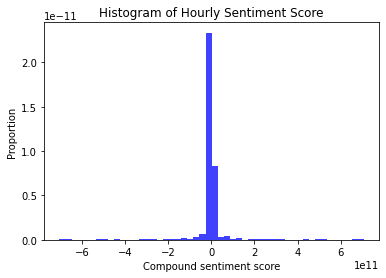

In [16]:
# the histogram of the data
n, bins, patches = plt.hist(merged['Score Change'], 50, density=True, facecolor='b', alpha=0.75)
plt.xlabel('Compound sentiment score')
plt.ylabel('Proportion')
plt.title('Histogram of Hourly Sentiment Score')
plt.grid(False)
plt.show()

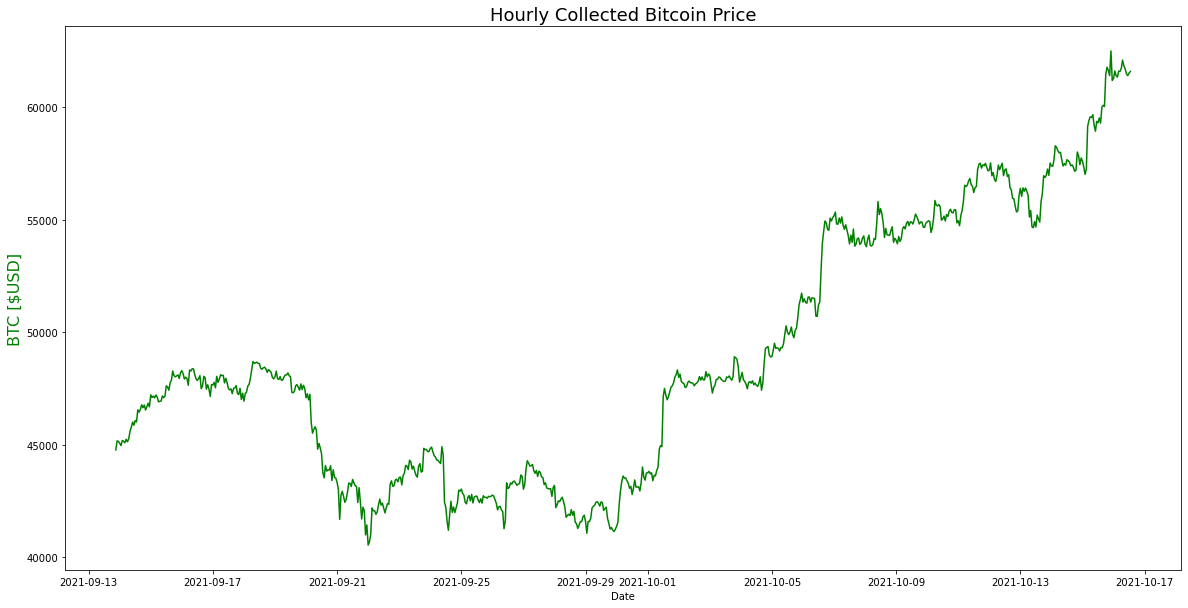

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Hourly Collected Bitcoin Price", fontsize=18)
ax.plot_date(merged.index, merged['Open'], 'g-')
ax.set_ylabel(f"{CURRENCY_SYMBOL} [$USD]", color='g', fontsize=16)
ax.set_xlabel('Date')
plt.show()


# Correlation Analysis

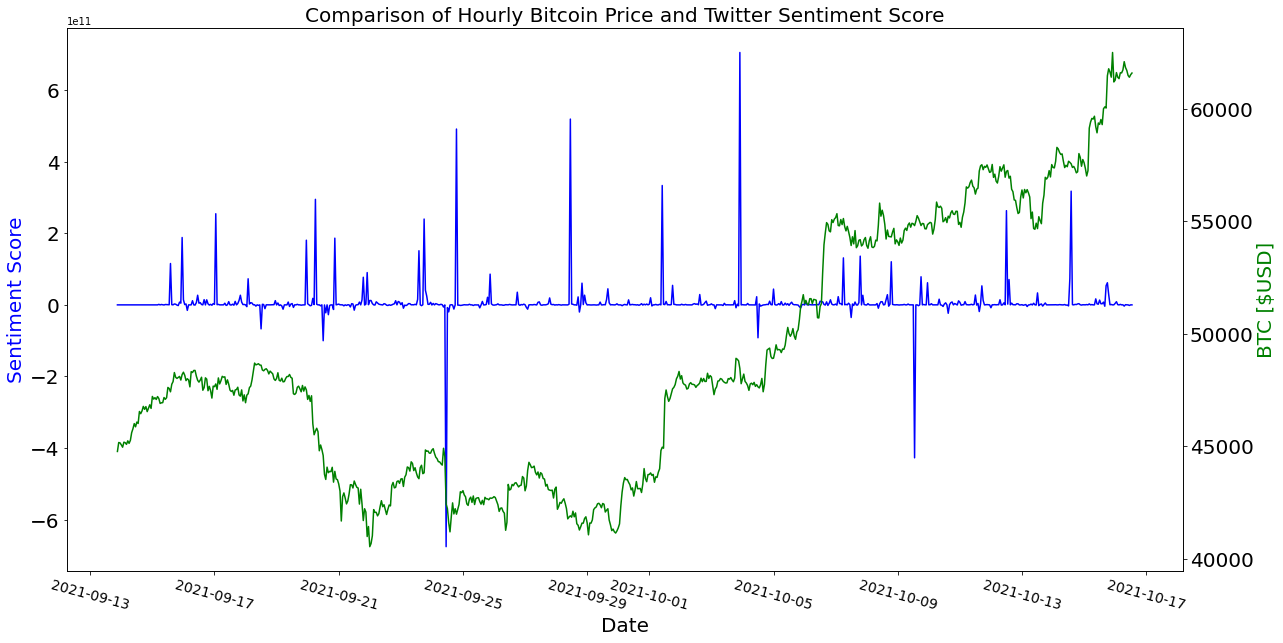

In [23]:
# Sentiment and Price
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Comparison of Hourly Bitcoin Price and Twitter Sentiment Score", fontsize=20)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(merged.index, merged['score'], 'b-')
ax2.plot_date(merged.index, merged['Open'], 'g-')
ax1.set_ylabel("Sentiment Score", color='b', fontsize=20)
ax2.set_ylabel(f"{CURRENCY_SYMBOL} [$USD]", color='g', fontsize=20)
ax1.set_xlabel('Date', fontsize=20)
ax1.tick_params(axis='y', which='major', labelsize=20)
ax2.tick_params(axis='y', which='major', labelsize=20)
for tick in ax1.get_xticklabels():
    tick.set_rotation(345)
plt.show()

In [14]:
def align_yaxis(ax1, ax2):
    """Align zeros of the two axes, zooming them out by same ratio"""
    axes = (ax1, ax2)
    extrema = [ax.get_ylim() for ax in axes]
    tops = [extr[1] / (extr[1] - extr[0]) for extr in extrema]
    # Ensure that plots (intervals) are ordered bottom to top:
    if tops[0] > tops[1]:
        axes, extrema, tops = [list(reversed(l)) for l in (axes, extrema, tops)]

    # How much would the plot overflow if we kept current zoom levels?
    tot_span = tops[1] + 1 - tops[0]

    b_new_t = extrema[0][0] + tot_span * (extrema[0][1] - extrema[0][0])
    t_new_b = extrema[1][1] - tot_span * (extrema[1][1] - extrema[1][0])
    axes[0].set_ylim(extrema[0][0], b_new_t)
    axes[1].set_ylim(t_new_b, extrema[1][1])

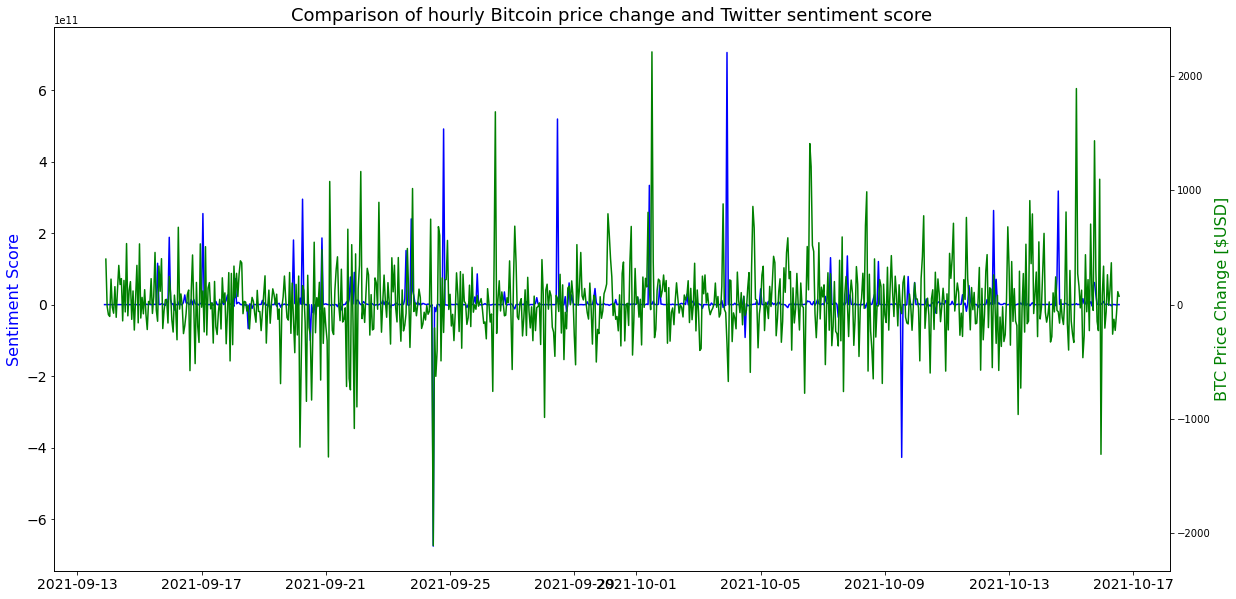

In [15]:
# Sentiment and Price Change
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Comparison of hourly Bitcoin price change and Twitter sentiment score", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(merged.index, merged['score'], 'b')
ax2.plot_date(merged.index, merged['Change'], 'g')
ax1.set_ylabel("Sentiment Score", color='b', fontsize=16)
ax2.set_ylabel(f"{CURRENCY_SYMBOL} Price Change [$USD]", color='g', fontsize=16)
align_yaxis(ax1, ax2)
plt.show()

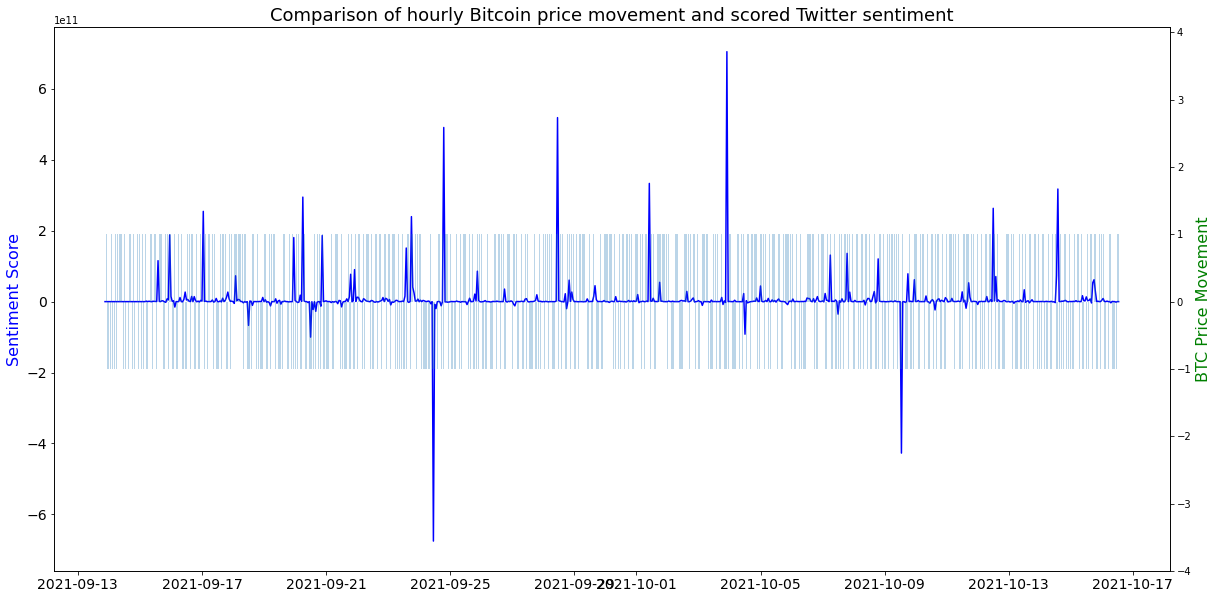

In [16]:
# Sentiment and Price Movement
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Comparison of hourly Bitcoin price movement and scored Twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax2.set_ylim([-4,4])
ax1.plot_date(merged.index, merged['score'], 'b')
#ax2.plot_date(merged.index, merged['Movement'], 'b-')
ax2.bar(merged.index, merged['Movement'], width=0.03, alpha=0.3)
ax1.set_ylabel("Sentiment Score", color='blue', fontsize=16)
ax2.set_ylabel(f"{CURRENCY_SYMBOL} Price Movement", color='g', fontsize=16)
align_yaxis(ax1, ax2)
plt.show()

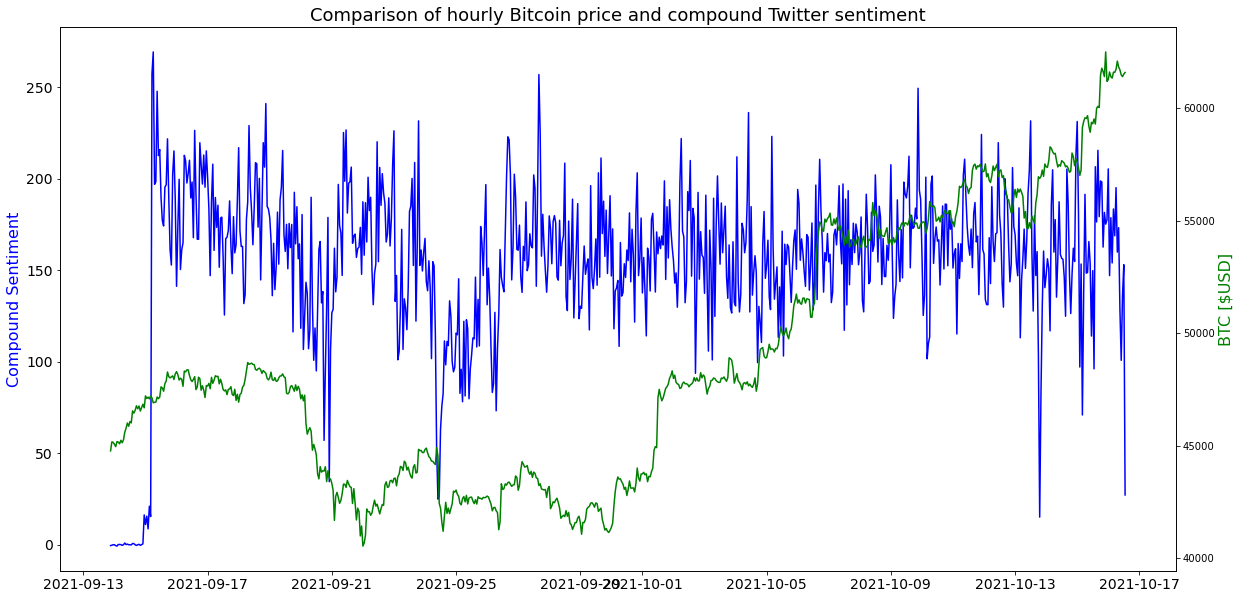

In [17]:
# Compound and Price
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Comparison of hourly Bitcoin price and compound Twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(merged.index, merged['compound'], 'b-')
ax2.plot_date(merged.index, merged['Open'], 'g-')
ax1.set_ylabel("Compound Sentiment", color='b', fontsize=16)
ax2.set_ylabel(f"{CURRENCY_SYMBOL} [$USD]", color='g', fontsize=16)
plt.show()

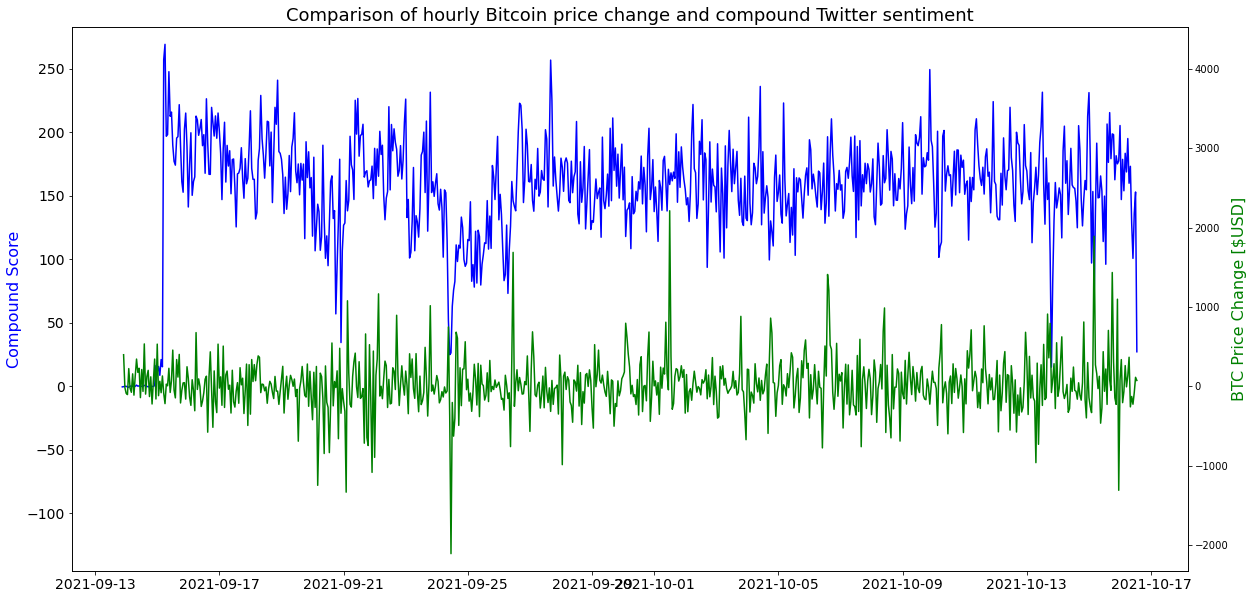

In [18]:
# Compound and Price Change
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Comparison of hourly Bitcoin price change and compound Twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(merged.index, merged['compound'], 'b')
ax2.plot_date(merged.index, merged['Change'], 'g')
ax1.set_ylabel("Compound Score", color='b', fontsize=16)
ax2.set_ylabel(f"{CURRENCY_SYMBOL} Price Change [$USD]", color='g', fontsize=16)
align_yaxis(ax1, ax2)
plt.show()

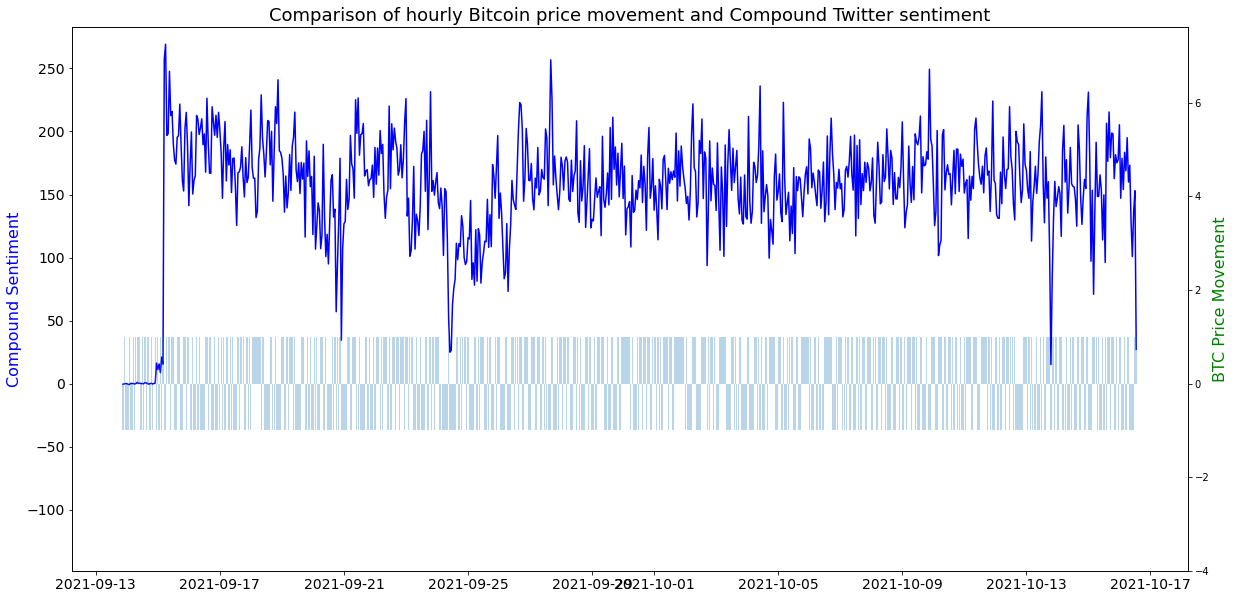

In [19]:
# Compound and Price Movement
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Comparison of hourly Bitcoin price movement and Compound Twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax2.set_ylim([-4,4])
ax1.plot_date(merged.index, merged['compound'], 'b')
ax2.bar(merged.index, merged['Movement'], width=0.04, alpha=0.3)
ax1.set_ylabel("Compound Sentiment", color='b', fontsize=16)
ax2.set_ylabel(f"{CURRENCY_SYMBOL} Price Movement", color='g', fontsize=16)
align_yaxis(ax1, ax2)
plt.show()

## Normalise

In [20]:
sentiment = merged['score']
compound = merged['compound']
price = merged['Open']
price_change = merged['Change']

In [21]:
sentiment_norm = sentiment / max(sentiment.max(), abs(sentiment.min()))
compound_norm = compound / max(compound.max(), abs(compound.min()))
price_norm = price / max(price.max(), abs(price.min()))
price_change_norm = price_change / max(price_change.max(), abs(price_change.min()))

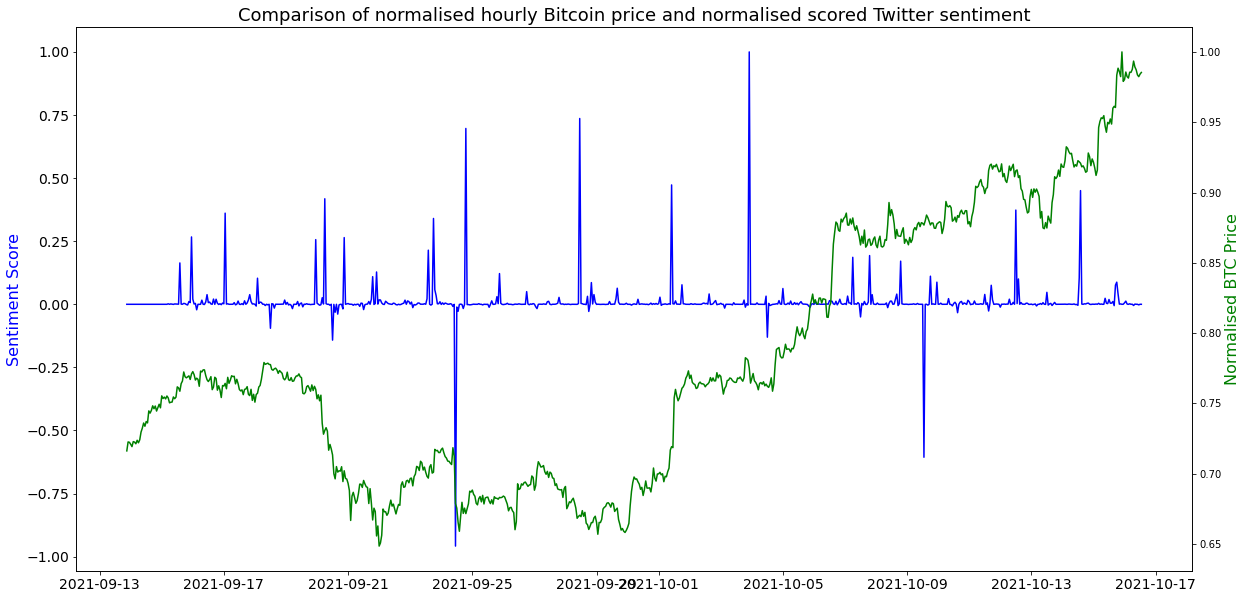

In [22]:
# Sentiment and Price -- Normalised
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Comparison of normalised hourly Bitcoin price and normalised scored Twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(sentiment_norm.index, sentiment_norm, 'b')
ax2.plot_date(price_norm.index, price_norm, 'g')
ax1.set_ylabel("Sentiment Score", color='b', fontsize=16)
ax2.set_ylabel(f"Normalised {CURRENCY_SYMBOL} Price", color='g', fontsize=16)
plt.show()

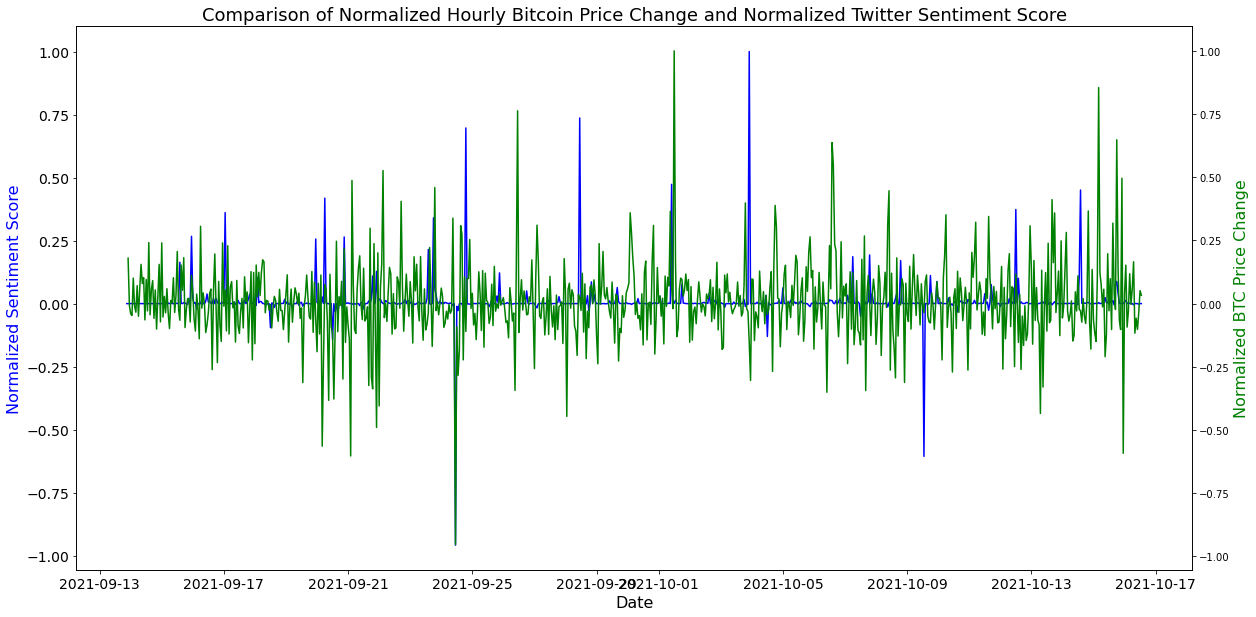

In [23]:
# Sentiment and Price Change
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Comparison of Normalized Hourly Bitcoin Price Change and Normalized Twitter Sentiment Score", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(sentiment_norm.index, sentiment_norm, 'b')
ax2.plot_date(price_change_norm.index, price_change_norm, 'g')
ax1.set_ylabel("Normalized Sentiment Score", color='b', fontsize=16)
ax2.set_ylabel(f"Normalized {CURRENCY_SYMBOL} Price Change", color='g', fontsize=16)
ax1.set_xlabel('Date', fontsize=16)
align_yaxis(ax1, ax2)
plt.show()

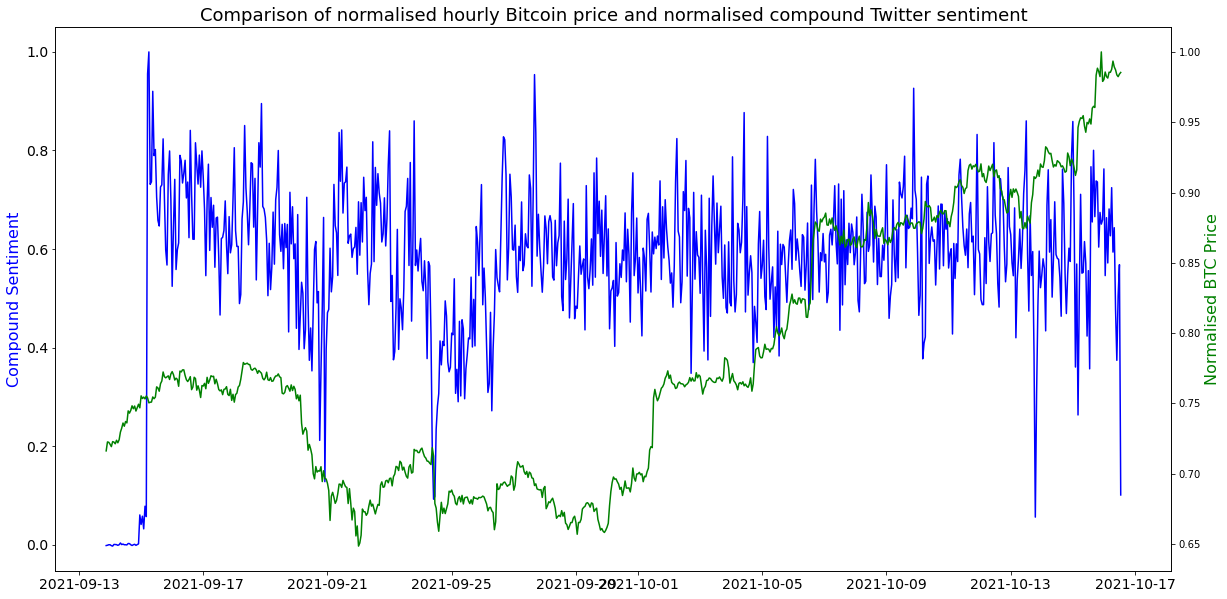

In [24]:
# Compound and Price -- Normalised
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Comparison of normalised hourly Bitcoin price and normalised compound Twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(compound_norm.index, compound_norm, 'b')
ax2.plot_date(price_norm.index, price_norm, 'g')
ax1.set_ylabel("Compound Sentiment", color='b', fontsize=16)
ax2.set_ylabel(f"Normalised {CURRENCY_SYMBOL} Price", color='g', fontsize=16)
plt.show()

## Correlation

In [25]:
# Define the cross-correlation function

def crosscorr(datax, datay, lag=0, method="pearson"):
    """ Lag-N cross correlation. 
    Parameters
    —------—
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    —------—
    crosscorr : float
    """
    return datax.corr(datay.shift(lag), method=method)

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


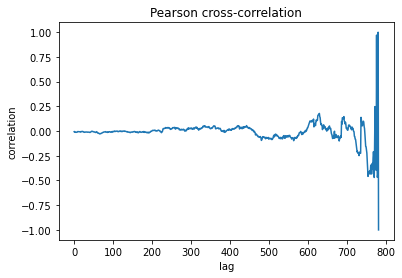

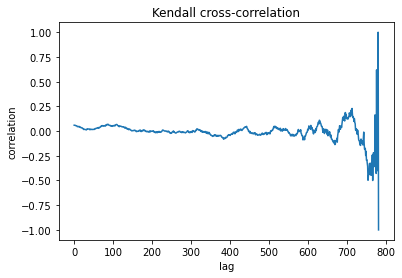

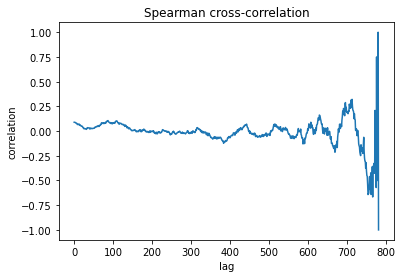

In [26]:
length = len(price)

xcov = [crosscorr(sentiment, price, lag=i, method="pearson") for i in range(0, length)]
plt.plot(range(0,length), xcov)
plt.title("Pearson cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(sentiment, price, lag=i, method="kendall") for i in range(0,length)]
plt.plot(range(0,length), xcov)
plt.title("Kendall cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(sentiment, price, lag=i, method="spearman") for i in range(0,length)]
plt.plot(range(0,length), xcov)
plt.title("Spearman cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

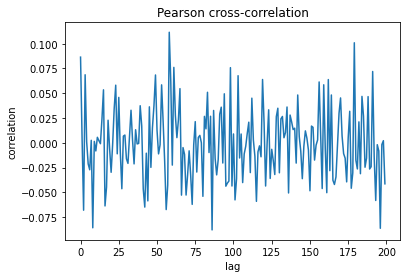

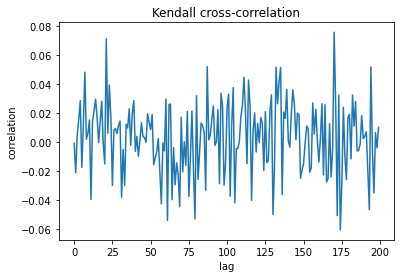

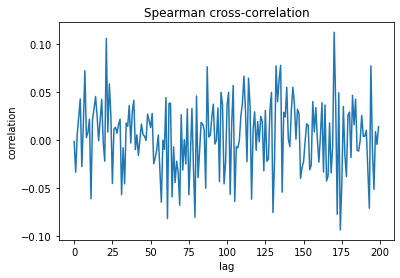

In [27]:
xcov = [crosscorr(sentiment, price_change, lag=i, method="pearson") for i in range(0,200)]
plt.plot(range(0,200), xcov)
plt.title("Pearson cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(sentiment, price_change, lag=i, method="kendall") for i in range(0,200)]
plt.plot(range(0,200), xcov)
plt.title("Kendall cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(sentiment, price_change, lag=i, method="spearman") for i in range(0,200)]
plt.plot(range(0,200), xcov)
plt.title("Spearman cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

In [28]:
merged.corr(method='pearson')

,Tweets,Likes,Retweets,compound,score,Compound Change,Score Change,Compound Movement,Score Movement,Open,High,Low,Close,Adj Close,Volume,Change,Movement
Tweets,1.000000,0.441694,0.372251,0.744767,0.049295,0.115754,0.018215,0.093711,0.041912,0.120479,0.117084,0.121541,0.118681,0.118681,-0.133078,-0.015748,0.009606
Likes,0.441694,1.000000,0.771319,0.286496,0.245067,0.031955,0.168503,0.019252,0.171471,0.047403,0.046931,0.047240,0.047094,0.047094,-0.020989,-0.003012,0.019419
Retweets,0.372251,0.771319,1.000000,0.236069,0.205988,0.024619,0.143085,-0.004612,0.155927,0.025883,0.025008,0.024829,0.024365,0.024365,-0.019657,0.014064,0.016326
compound,0.744767,0.286496,0.236069,1.000000,0.069725,0.382231,0.032903,0.294168,0.028587,0.147189,0.143507,0.148820,0.145644,0.145644,-0.162055,-0.010265,0.004865
score,0.049295,0.245067,0.205988,0.069725,1.000000,0.011558,0.704142,-0.014478,0.194944,-0.005978,-0.006515,-0.006374,-0.006776,-0.006776,-0.025244,0.086413,0.042561
Compound Change,0.115754,0.031955,0.024619,0.382231,0.011558,1.000000,0.050995,0.759326,0.043668,-0.014460,-0.014874,-0.014975,-0.015435,-0.015435,-0.044155,-0.009766,0.027619
Score Change,0.018215,0.168503,0.143085,0.032903,0.704142,0.050995,1.000000,0.036777,0.271490,-0.000098,-0.000828,-0.001280,-0.002011,-0.002011,-0.003684,0.065131,0.035166
Compound Movement,0.093711,0.019252,-0.004612,0.294168,-0.014478,0.759326,0.036777,1.000000,0.076687,-0.037817,-0.038038,-0.037982,-0.038601,-0.038601,-0.053998,-0.044196,0.015255
Score Movement,0.041912,0.171471,0.155927,0.028587,0.194944,0.043668,0.271490,0.076687,1.000000,0.017287,0.017873,0.017127,0.017622,0.017622,0.067422,-0.004179,0.020676
Open,0.120479,0.047403,0.025883,0.147189,-0.005978,-0.014460,-0.000098,-0.037817,0.017287,1.000000,0.999897,0.999904,0.999806,0.999806,-0.066694,0.078175,0.017564


In [29]:
comparison_compound = np.where(merged['Compound Movement'] == merged['Movement'], True, False)
np.unique(comparison_compound, return_counts=True)

(array([False,  True]), array([386, 398]))

In [30]:
comparison_score = np.where(merged['Score Movement'] == merged['Movement'], True, False)
np.unique(comparison_score, return_counts=True)

(array([False,  True]), array([384, 400]))

In [31]:
merged.head(5)

,Hour,Tweets,Likes,Retweets,compound,score,Compound Change,Score Change,Compound Movement,Score Movement,Time,Open,High,Low,Close,Adj Close,Volume,Change,Movement
Hour,,,,,,,,,,,,,,,,,,,
2021-09-13 21:00:00,2021-09-13 21:00:00,1,0,0,-0.4404,-7.4868,-1.3102,-491.9654,-1,-1,2021-09-13 21:00:00,44770.371094,45156.468750,44770.371094,45156.468750,45156.468750,0.0,NaN,-1
2021-09-13 22:00:00,2021-09-13 22:00:00,1,0,0,-0.2732,-253.8028,0.1672,-246.3160,1,-1,2021-09-13 22:00:00,45168.273438,45460.640625,44950.796875,45158.886719,45158.886719,338006016.0,397.902344,1
2021-09-13 23:00:00,2021-09-13 23:00:00,1,0,0,0.0000,0.0000,0.2732,253.8028,1,1,2021-09-13 23:00:00,45152.378906,45220.621094,44993.496094,45086.214844,45086.214844,210644992.0,-15.894531,-1
2021-09-14 00:00:00,2021-09-14 00:00:00,1,0,0,0.0000,0.0000,0.0000,0.0000,-1,-1,2021-09-14 00:00:00,45063.773438,45131.945312,44856.496094,44963.074219,44963.074219,34320384.0,-88.605469,-1
2021-09-14 01:00:00,2021-09-14 01:00:00,1,0,0,-0.4939,-602.0641,-0.4939,-602.0641,-1,-1,2021-09-14 01:00:00,44960.050781,45277.441406,44752.332031,45201.953125,45201.953125,285896704.0,-103.722656,-1


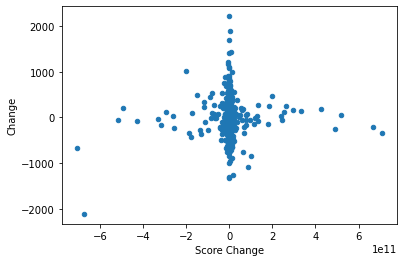

In [32]:
ax = merged.plot.scatter('Score Change', 'Change')

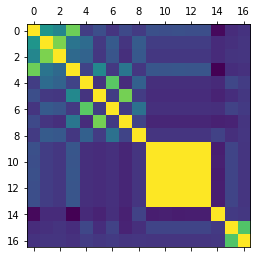

In [33]:
plt.matshow(merged.corr())
plt.show()

In [34]:
corr = merged.corr()
corr.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1).set_precision(2)

,Tweets,Likes,Retweets,compound,score,Compound Change,Score Change,Compound Movement,Score Movement,Open,High,Low,Close,Adj Close,Volume,Change,Movement
Tweets,1.00,0.44,0.37,0.74,0.05,0.12,0.02,0.09,0.04,0.12,0.12,0.12,0.12,0.12,-0.13,-0.02,0.01
Likes,0.44,1.00,0.77,0.29,0.25,0.03,0.17,0.02,0.17,0.05,0.05,0.05,0.05,0.05,-0.02,-0.00,0.02
Retweets,0.37,0.77,1.00,0.24,0.21,0.02,0.14,-0.00,0.16,0.03,0.03,0.02,0.02,0.02,-0.02,0.01,0.02
compound,0.74,0.29,0.24,1.00,0.07,0.38,0.03,0.29,0.03,0.15,0.14,0.15,0.15,0.15,-0.16,-0.01,0.00
score,0.05,0.25,0.21,0.07,1.00,0.01,0.70,-0.01,0.19,-0.01,-0.01,-0.01,-0.01,-0.01,-0.03,0.09,0.04
Compound Change,0.12,0.03,0.02,0.38,0.01,1.00,0.05,0.76,0.04,-0.01,-0.01,-0.01,-0.02,-0.02,-0.04,-0.01,0.03
Score Change,0.02,0.17,0.14,0.03,0.70,0.05,1.00,0.04,0.27,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.07,0.04
Compound Movement,0.09,0.02,-0.00,0.29,-0.01,0.76,0.04,1.00,0.08,-0.04,-0.04,-0.04,-0.04,-0.04,-0.05,-0.04,0.02
Score Movement,0.04,0.17,0.16,0.03,0.19,0.04,0.27,0.08,1.00,0.02,0.02,0.02,0.02,0.02,0.07,-0.00,0.02
Open,0.12,0.05,0.03,0.15,-0.01,-0.01,-0.00,-0.04,0.02,1.00,1.00,1.00,1.00,1.00,-0.07,0.08,0.02


# Export merged dataframe to .csv file

In [36]:
path = f"./data"
output_file = os.path.join(path, 'MergedTwitterPrice.csv')
merged.to_csv(output_file, encoding='utf-8', index=False)